In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

In [2]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/Marvels-Spider-Man-PS4-Game/product-reviews/B07X23YRCS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
customer_name = []
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [6]:
len(customer_name)

354

In [8]:
len(review_title)

354

In [9]:
len(rate)

354

In [10]:
len(review_content)

354

In [11]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [12]:
amaplus = pd.DataFrame()

In [13]:
amaplus['Customer Name'] = customer_name
amaplus['Review Title'] = review_title
amaplus['Rating'] = rate
amaplus['Reviews'] = review_content

In [14]:
amaplus.head()

,Customer Name,Review Title,Rating,Reviews
0,Avinash,all-in-one Package,5.0 out of 5 stars,This is a version of the game that includes ...
1,ROHIT ROY,love this game ❤️,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...
2,Vibhor,DLC code not working,2.0 out of 5 stars,The DLC code is not working and the cd is of...
3,Ashish vinayak.s,Incredible,5.0 out of 5 stars,Wow its was incredible...the packaging looks...
4,Mads,Fantastic game and a recommended buy,5.0 out of 5 stars,Delivery was spot on. Ordered it on 20th Jan...


In [15]:
amaplus.to_csv('amaplus.csv',index = True)

In [16]:
data = pd.read_csv("amaplus.csv",index_col=[0])

In [17]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Avinash,all-in-one Package,5.0 out of 5 stars,This is a version of the game that includes ...
1,ROHIT ROY,love this game ❤️,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...
2,Vibhor,DLC code not working,2.0 out of 5 stars,The DLC code is not working and the cd is of...
3,Ashish vinayak.s,Incredible,5.0 out of 5 stars,Wow its was incredible...the packaging looks...
4,Mads,Fantastic game and a recommended buy,5.0 out of 5 stars,Delivery was spot on. Ordered it on 20th Jan...


In [18]:
data['text']=data['Review Title']+' '+data['Reviews']

In [19]:
data

,Customer Name,Review Title,Rating,Reviews,text
0,Avinash,all-in-one Package,5.0 out of 5 stars,This is a version of the game that includes ...,all-in-one Package This is a version of the ...
1,ROHIT ROY,love this game ❤️,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...,love this game ❤️ Your browser does not supp...
2,Vibhor,DLC code not working,2.0 out of 5 stars,The DLC code is not working and the cd is of...,DLC code not working The DLC code is not wor...
3,Ashish vinayak.s,Incredible,5.0 out of 5 stars,Wow its was incredible...the packaging looks...,Incredible Wow its was incredible...the pack...
4,Mads,Fantastic game and a recommended buy,5.0 out of 5 stars,Delivery was spot on. Ordered it on 20th Jan...,Fantastic game and a recommended buy Deliver...
...,...,...,...,...,...
349,Lucky Raj,Excellent Game,5.0 out of 5 stars,Excellent Game,Excellent Game Excellent Game
350,Amazon Customer,Awesome!!,5.0 out of 5 stars,Awesome... Worth every penny!! Go for it...,Awesome!! Awesome... Worth every penny!! Go ...
351,Sundy,Excellent,5.0 out of 5 stars,Nice game,Excellent Nice game
352,Abhinav Venkat Shankar,Fantastic,5.0 out of 5 stars,Best game you will ever play,Fantastic Best game you will ever play


In [20]:

import re

In [21]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [22]:
data['clean1']=data['text'].apply(cleantext)

In [23]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Avinash,all-in-one Package,5.0 out of 5 stars,This is a version of the game that includes ...,all-in-one Package This is a version of the ...,all in one package this is a version of the ...
1,ROHIT ROY,love this game ❤️,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...,love this game ❤️ Your browser does not supp...,love this game ❤️ your browser does not supp...
2,Vibhor,DLC code not working,2.0 out of 5 stars,The DLC code is not working and the cd is of...,DLC code not working The DLC code is not wor...,dlc code not working the dlc code is not wor...
3,Ashish vinayak.s,Incredible,5.0 out of 5 stars,Wow its was incredible...the packaging looks...,Incredible Wow its was incredible...the pack...,incredible wow its was incrediblethe packagi...
4,Mads,Fantastic game and a recommended buy,5.0 out of 5 stars,Delivery was spot on. Ordered it on 20th Jan...,Fantastic game and a recommended buy Deliver...,fantastic game and a recommended buy deliver...


In [24]:
!pip install text2emotion 


In [25]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:

def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')


In [28]:
data['Happy']=data['clean1'].apply(happy)
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

In [29]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Avinash,all-in-one Package,5.0 out of 5 stars,This is a version of the game that includes ...,all-in-one Package This is a version of the ...,all in one package this is a version of the ...,0.20,0.00,0.30,0.30,0.20
1,ROHIT ROY,love this game ❤️,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...,love this game ❤️ Your browser does not supp...,love this game ❤️ your browser does not supp...,0.75,0.00,0.25,0.00,0.00
2,Vibhor,DLC code not working,2.0 out of 5 stars,The DLC code is not working and the cd is of...,DLC code not working The DLC code is not wor...,dlc code not working the dlc code is not wor...,0.00,0.00,1.00,0.00,0.00
3,Ashish vinayak.s,Incredible,5.0 out of 5 stars,Wow its was incredible...the packaging looks...,Incredible Wow its was incredible...the pack...,incredible wow its was incrediblethe packagi...,0.00,0.00,0.00,0.00,1.00
4,Mads,Fantastic game and a recommended buy,5.0 out of 5 stars,Delivery was spot on. Ordered it on 20th Jan...,Fantastic game and a recommended buy Deliver...,fantastic game and a recommended buy deliver...,0.29,0.07,0.43,0.14,0.07


In [30]:
import matplotlib.pyplot as plt

In [31]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [32]:
mylabels=['happy','angry','fear','sad','surprise']

In [35]:
total

[101.16, 4.66, 76.73, 30.290000000000003, 122.81]

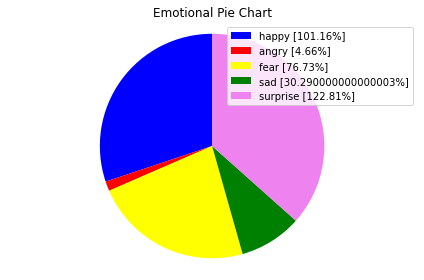

In [34]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()




>From the above plot it infers that most of the customers are happy and suprised with the product